In [55]:
#Exploring AI Job Salaries by Experience and Location
%pip install scipy
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [56]:
#%%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\allen\Downloads\archive (4)\ai_job_dataset.csv")
# %%
print(df)

        job_id                    job_title  salary_usd salary_currency  \
0      AI00001        AI Research Scientist       90376             USD   
1      AI00002         AI Software Engineer       61895             USD   
2      AI00003                AI Specialist      152626             USD   
3      AI00004                 NLP Engineer       80215             USD   
4      AI00005                AI Consultant       54624             EUR   
...        ...                          ...         ...             ...   
14995  AI14996            Robotics Engineer       38604             USD   
14996  AI14997  Machine Learning Researcher       57811             GBP   
14997  AI14998                 NLP Engineer      189490             USD   
14998  AI14999                   Head of AI       79461             EUR   
14999  AI15000     Computer Vision Engineer       56481             USD   

      experience_level employment_type company_location company_size  \
0                   SE     

In [57]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [58]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [60]:

df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [63]:
#Filtering Outliers
Q1 = df['salary_usd'].quantile(0.25)
Q3 = df['salary_usd'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df[(df['salary_usd']>= (Q1 -  1.5*IQR)) & (df['salary_usd']<= (Q3 + 1.5*IQR))]
df = filtered_data

In [64]:
df.job_title.value_counts().sort_values(ascending=False)

job_title
Machine Learning Researcher    777
Autonomous Systems Engineer    764
AI Software Engineer           763
Robotics Engineer              740
AI Architect                   740
Machine Learning Engineer      739
NLP Engineer                   739
Head of AI                     739
Data Analyst                   738
Data Engineer                  734
AI Research Scientist          723
AI Product Manager             718
Research Scientist             717
Principal Data Scientist       708
Computer Vision Engineer       702
ML Ops Engineer                701
Data Scientist                 700
AI Specialist                  694
Deep Learning Engineer         694
AI Consultant                  687
Name: count, dtype: int64

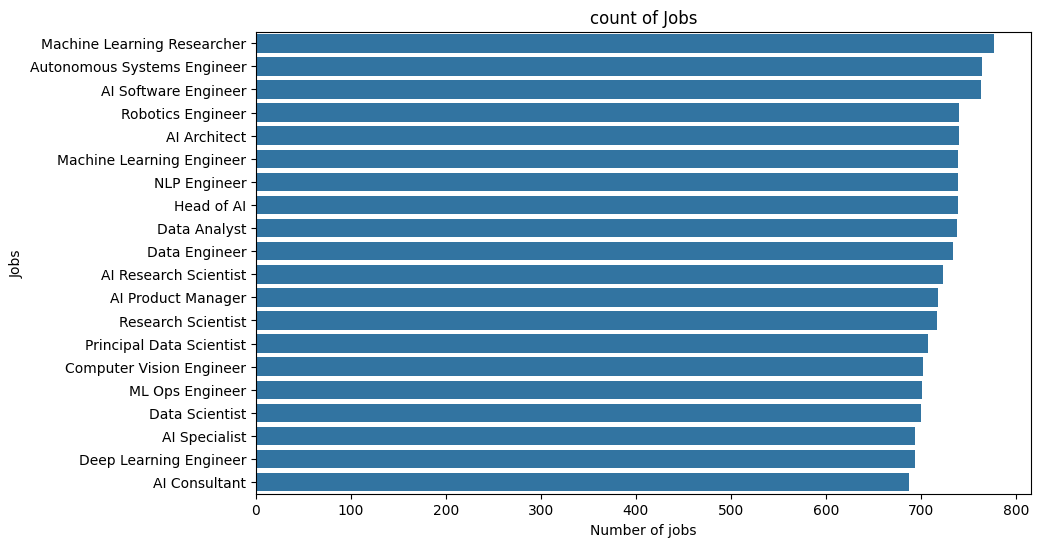

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(y="job_title", data=df, order=df["job_title"].value_counts().index)

plt.title("count of Jobs")
plt.xlabel("Number of jobs")
plt.ylabel("Jobs")

plt.show()

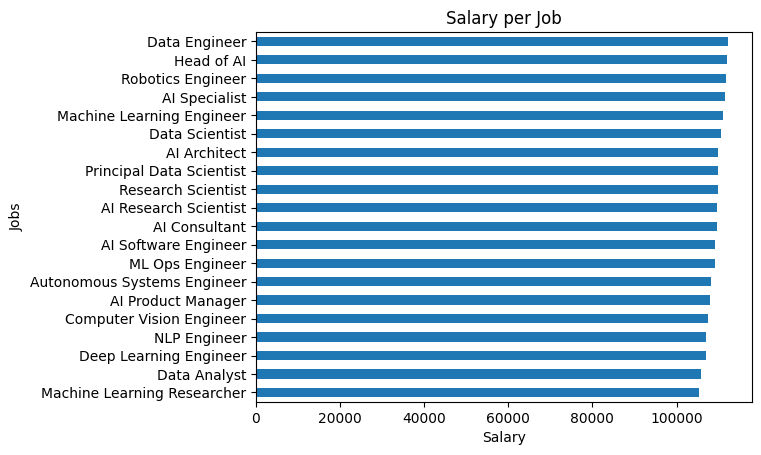

In [66]:
df.groupby("job_title")['salary_usd'].mean().sort_values().plot(kind='barh')
plt.title("Salary per Job")
plt.xlabel("Salary")
plt.ylabel("Jobs")

plt.show()

C:\Users\allen\AppData\Local\Temp\ipykernel_20368\2725844571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x='industry', y='count', palette='viridis')


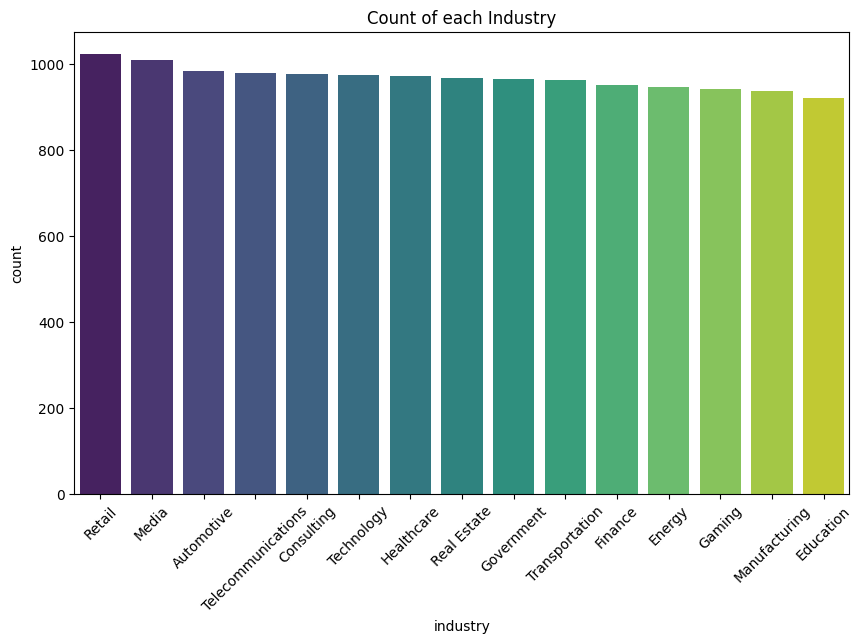

In [67]:
#Prepare the data
value_counts = df['industry'].value_counts().reset_index()
value_counts.columns = ['industry', 'count']

#Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=value_counts, x='industry', y='count', palette='viridis')

#customize Barplot
plt.title('Count of each Industry')
plt.ylabel('count')
plt.xlabel('industry')
plt.xticks(rotation = 45)
plt.tight_layout

plt.show()


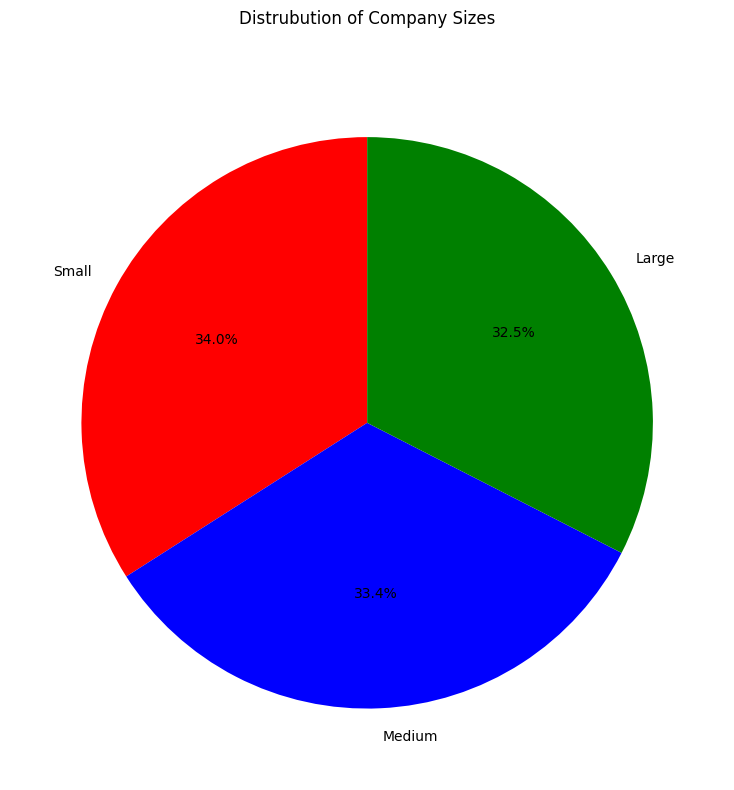

In [68]:
#Prepare data for company size
value_counts= df['company_size'].value_counts().reset_index()
value_counts['company_size']=value_counts['company_size'].replace({'S':'Small', 'M': 'Medium', 'L': 'Large'})
value_counts

#customize pie chart for company size
custom_colors = {'Small':'red','Medium': 'blue', 'Large': 'green'}

#create pie chart
plt.figure(figsize=(10,8))
plt.pie(
    value_counts['count'],
    labels = value_counts['company_size'],
    autopct='%1.1f%%', # show percentages
    startangle=90,
    colors =[custom_colors[size] for size in value_counts['company_size']]
)

#Modify piechart

plt.title('Distrubution of Company Sizes', pad = 30)
plt.tight_layout()
plt.show()

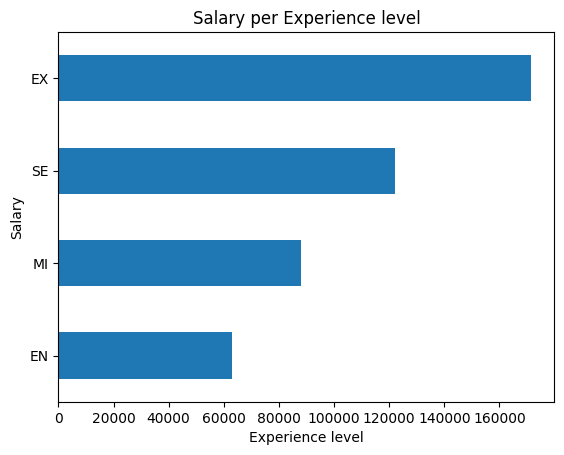

In [69]:
#Experience level and salary 

df.groupby('experience_level')['salary_usd'].mean().sort_values().plot(kind='barh')
plt.title('Salary per Experience level')
plt.ylabel('Salary')
plt.xlabel('Experience level')

plt.show()


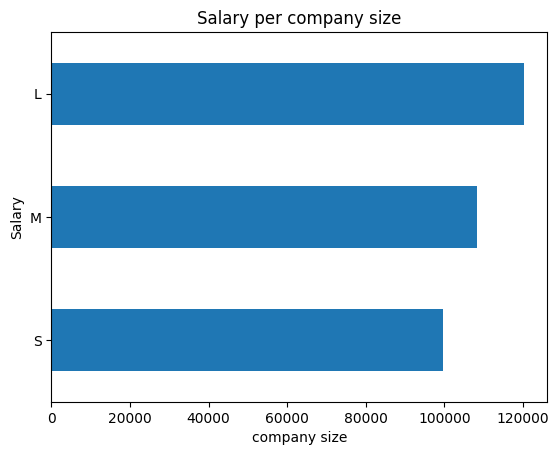

In [70]:
df.groupby('company_size')['salary_usd'].mean().sort_values().plot(kind='barh')
plt.title('Salary per company size')
plt.ylabel('Salary')
plt.xlabel('company size')
plt.show()

remote_ratio
0      33.911965
50     33.278226
100    32.809809
Name: count, dtype: float64


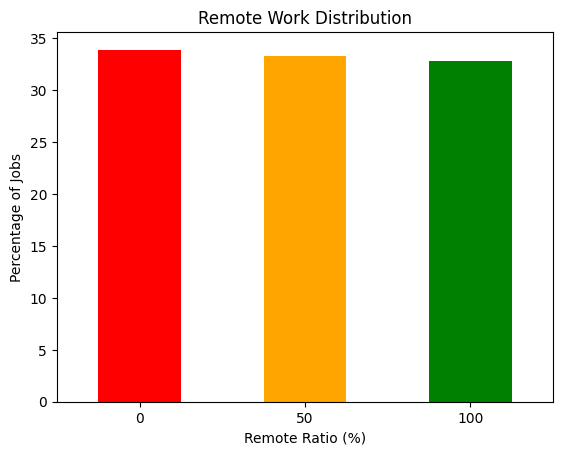

In [71]:
remote_counts = df['remote_ratio'].value_counts().sort_index()
remote_percentages = (remote_counts / len(df)) * 100
print(remote_percentages)

import matplotlib.pyplot as plt

remote_percentages.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Remote Work Distribution')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Percentage of Jobs')
plt.xticks(rotation=0)
plt.show()


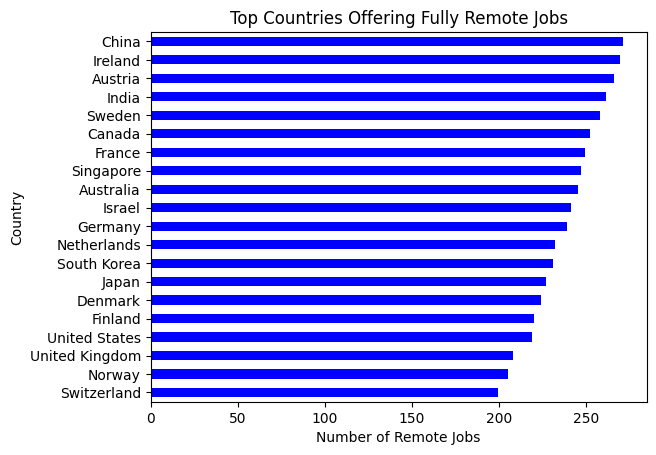

In [72]:
#Which countries offer the most remote jobs?
remote_jobs = df[df['remote_ratio']==100]
remote_by_country = remote_jobs['company_location'].value_counts()

remote_by_country.head(10)

remote_by_country.plot(kind='barh', color='blue')
plt.title('Top Countries Offering Fully Remote Jobs')
plt.xlabel('Number of Remote Jobs')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Highest at the top
plt.show()

In [73]:
#Is remote work correlated with higher or lower salaries?
correlation = df['remote_ratio'].corr(df['salary_usd'])
correlation

np.float64(0.013149397650919348)

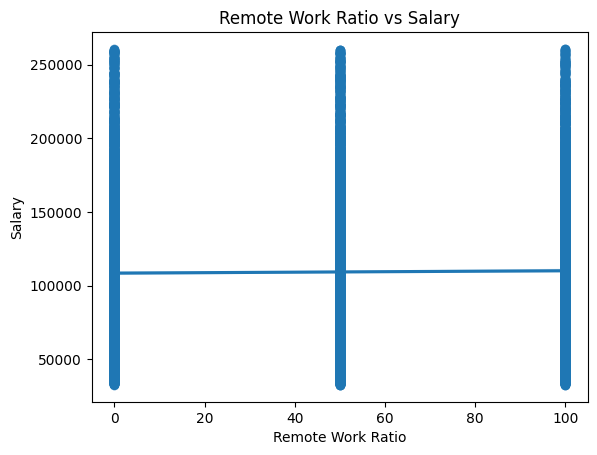

In [74]:
#Is remote work correlated with higher or lower salaries?
sns.regplot(data=df, x='remote_ratio', y='salary_usd')
plt.title('Remote Work Ratio vs Salary')
plt.ylabel('Salary')
plt.xlabel('Remote Work Ratio')
plt.show()

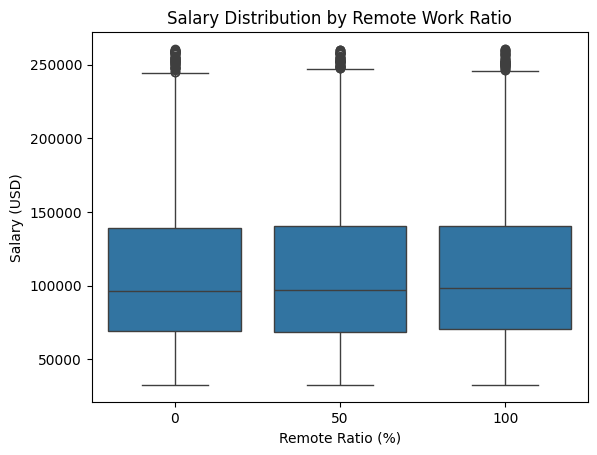

In [75]:
#What percentage of jobs offer full remote (100%) vs hybrid (50%) vs onsite (0%)?
sns.boxplot(data=df, x='remote_ratio', y='salary_usd')
plt.title('Salary Distribution by Remote Work Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (USD)')
plt.show()


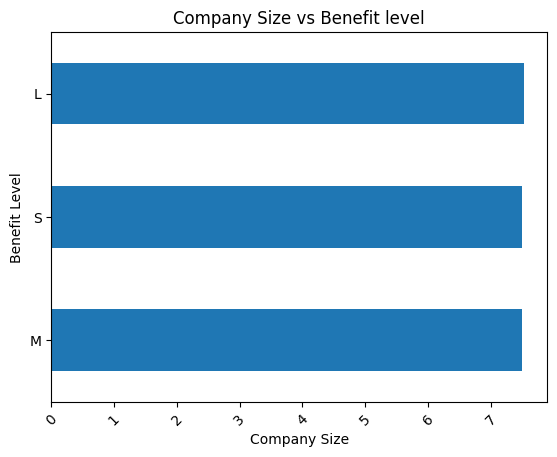

In [76]:
#Is there any correlation between job description length and benefit score?
df.groupby('company_size')['benefits_score'].mean().sort_values().plot(kind='barh')

#customize Barplot
plt.title('Company Size vs Benefit level')
plt.ylabel('Benefit Level')
plt.xlabel('Company Size')
plt.xticks(rotation = 45)
plt.tight_layout

plt.show()



In [77]:
# Split the 'required_skills' column by comma and expand into multiple columns
skills_split = df['required_skills'].str.split(',', expand=True)

skills_split



,0,1,2,3,4
0,Tableau,PyTorch,Kubernetes,Linux,NLP
1,Deep Learning,AWS,Mathematics,Python,Docker
2,Kubernetes,Deep Learning,Java,Hadoop,NLP
3,Scala,SQL,Linux,Python,None
4,MLOps,Java,Tableau,Python,None
...,...,...,...,...,...
14995,Java,Kubernetes,Azure,None,None
14996,Mathematics,Docker,SQL,Deep Learning,None
14997,Scala,Spark,NLP,None,None
14998,Java,Computer Vision,Python,TensorFlow,None


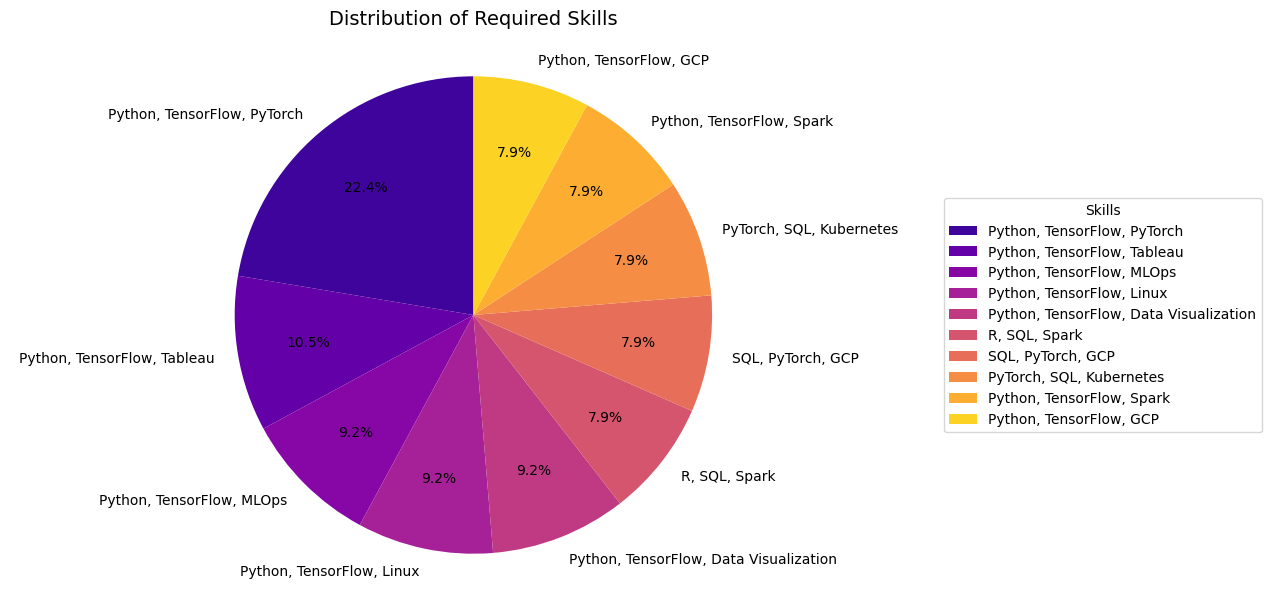

In [78]:
#Distribution of Required Skills

distr_skills = df['required_skills'].value_counts().reset_index().head(10)
distr_skills.columns=['required_skills','count']

plt.figure(figsize=(10,6))
colors = sns.color_palette("plasma", len(distr_skills))
wedges, texts, autotexts = plt.pie(
    distr_skills['count'],
    labels = distr_skills['required_skills'],
    autopct='%1.1f%%',
    startangle=90,
    colors = colors,
    pctdistance=0.70,
    textprops={'fontsize':10}
)

plt.axis('equal')
plt.title('Distribution of Required Skills', pad=20, fontsize=14, loc='center')
plt.tight_layout()

# Optional: Add legend for better readability
plt.legend(
    wedges,
    distr_skills['required_skills'],
    title="Skills",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()


In [79]:

distr_skills

,required_skills,count
0,"Python, TensorFlow, PyTorch",17
1,"Python, TensorFlow, Tableau",8
2,"Python, TensorFlow, MLOps",7
3,"Python, TensorFlow, Linux",7
4,"Python, TensorFlow, Data Visualization",7
5,"R, SQL, Spark",6
6,"SQL, PyTorch, GCP",6
7,"PyTorch, SQL, Kubernetes",6
8,"Python, TensorFlow, Spark",6
9,"Python, TensorFlow, GCP",6


In [80]:
value_counts_2 = df['required_skills'].value_counts().reset_index()
value_counts_2

,required_skills,count
0,"Python, TensorFlow, PyTorch",17
1,"Python, TensorFlow, Tableau",8
2,"Python, TensorFlow, MLOps",7
3,"Python, TensorFlow, Linux",7
4,"Python, TensorFlow, Data Visualization",7
...,...,...
13254,"Tableau, Computer Vision, Hadoop, NLP",1
13255,"Tableau, Java, R, Spark",1
13256,"R, Tableau, Git, Python, Java",1
13257,"GCP, Git, Mathematics",1


In [81]:
df['required_skills']

0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 14517, dtype: object

In [82]:
# 1. Split the string into a list
df['required_skills'] = df['required_skills'].astype(str).str.split(',')

# 2. Remove extra spaces
df['required_skills'] = df['required_skills'].apply(lambda x: [skill.strip() for skill in x])

# 3. Explode the list into rows
exploded_df = df.explode('required_skills')

# 4. (Optional) Rename for clarity
exploded_df = exploded_df.rename(columns={'required_skills': 'Skill'})

print(exploded_df.head())


    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
0  AI00001  AI Research Scientist       90376             USD   
0  AI00001  AI Research Scientist       90376             USD   
0  AI00001  AI Research Scientist       90376             USD   
0  AI00001  AI Research Scientist       90376             USD   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
0               SE              CT            China            M   
0               SE              CT            China            M   
0               SE              CT            China            M   
0               SE              CT            China            M   

  employee_residence  remote_ratio       Skill education_required  \
0              China            50     Tableau           Bachelor   
0              China            50     PyTorch           Bache

In [84]:
exploded_df.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,Skill,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Tableau,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,PyTorch,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Kubernetes,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Linux,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,NLP,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,Deep Learning,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,AWS,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,Mathematics,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,Python,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,Docker,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc


In [88]:
exploded_df['Skill']

0              Tableau
0              PyTorch
0           Kubernetes
0                Linux
0                  NLP
             ...      
14999            Scala
14999            Azure
14999    Deep Learning
14999              GCP
14999      Mathematics
Name: Skill, Length: 57978, dtype: object

C:\Users\allen\AppData\Local\Temp\ipykernel_20368\1902029109.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  skills_count.column=['Skill','count']


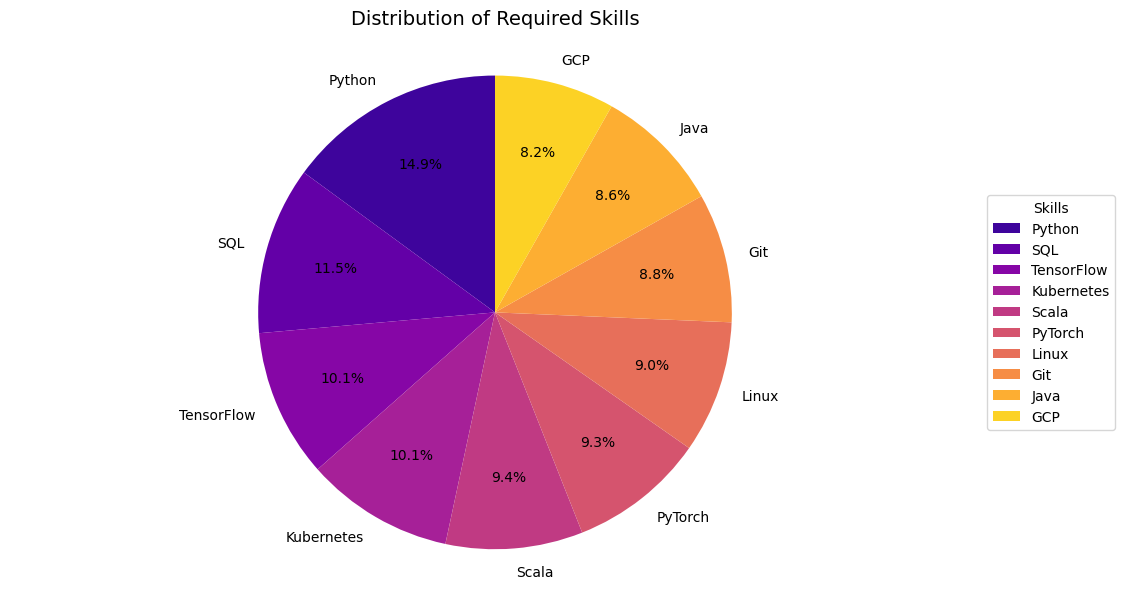

In [90]:
skills_count=exploded_df['Skill'].value_counts().reset_index().head(10)
skills_count.column=['Skill','count']

plt.figure(figsize=(10,6))
colors = sns.color_palette("plasma", len(skills_count))
wedges, texts, autotexts = plt.pie(
    skills_count['count'],
    labels = skills_count['Skill'],
    autopct='%1.1f%%',
    startangle=90,
    colors = colors,
    pctdistance=0.70,
    textprops={'fontsize':10}
)

plt.axis('equal')
plt.title('Distribution of Required Skills', pad=20, fontsize=14, loc='center')
plt.tight_layout()

# Optional: Add legend for better readability
plt.legend(
    wedges,
    skills_count['Skill'],
    title="Skills",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()